# Traffic Data Analysis  #


### Objectives ###

- Find why in foggy days, rush hour in the evening are not as busy as in the morning

### Libraries ###

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps

### Gathering Data ###

In [6]:
df = pd.read_csv('Data/raw_data.csv')
df.describe(include='all')

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
count,48204.000000,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204
unique,NaN,11,NaN,NaN,NaN,NaN,11,38,40575
top,NaN,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,19-05-2013 10:00
freq,NaN,7,NaN,NaN,NaN,NaN,15164,11665,6
mean,3259.818355,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN
std,1986.860670,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1193.000000,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN
50%,3380.000000,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN
75%,4933.000000,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN


In [7]:
df.head(10)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
5,5181,NaN,291.72,0.0,0.0,1,Clear,sky is clear,02-10-2012 14:00
6,5584,NaN,293.17,0.0,0.0,1,Clear,sky is clear,02-10-2012 15:00
7,6015,NaN,293.86,0.0,0.0,1,Clear,sky is clear,02-10-2012 16:00
8,5791,NaN,294.14,0.0,0.0,20,Clouds,few clouds,02-10-2012 17:00
9,4770,NaN,293.10,0.0,0.0,20,Clouds,few clouds,02-10-2012 18:00


### Cleaning Data ###

In [8]:
df.isna().sum()

traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
dtype: int64

Replace NaN as No Holiday

In [9]:
df['holiday'] = df['holiday'].fillna('No Holiday')

query  = """
        SELECT holiday, count(holiday) as count
        FROM df
        GROUP BY holiday
        ORDER BY count DESC
"""

ps.sqldf(query, locals())

,holiday,count
0,No Holiday,48143
1,Labor Day,7
2,Thanksgiving Day,6
3,New Years Day,6
4,Martin Luther King Jr Day,6
5,Christmas Day,6
6,Washingtons Birthday,5
7,Veterans Day,5
8,State Fair,5
9,Memorial Day,5


In [10]:
df['date'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M').dt.date
df['year'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M').dt.year
df['month'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M').dt.month
df['day'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M').dt.day
df['hour'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M').dt.hour


### EDA ###

In [11]:
df.head(10)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,date,year,month,day,hour
0,5545,No Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,2012-10-02,2012,10,2,9
1,4516,No Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,2012-10-02,2012,10,2,10
2,4767,No Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,2012-10-02,2012,10,2,11
3,5026,No Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,2012-10-02,2012,10,2,12
4,4918,No Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,2012-10-02,2012,10,2,13
5,5181,No Holiday,291.72,0.0,0.0,1,Clear,sky is clear,02-10-2012 14:00,2012-10-02,2012,10,2,14
6,5584,No Holiday,293.17,0.0,0.0,1,Clear,sky is clear,02-10-2012 15:00,2012-10-02,2012,10,2,15
7,6015,No Holiday,293.86,0.0,0.0,1,Clear,sky is clear,02-10-2012 16:00,2012-10-02,2012,10,2,16
8,5791,No Holiday,294.14,0.0,0.0,20,Clouds,few clouds,02-10-2012 17:00,2012-10-02,2012,10,2,17
9,4770,No Holiday,293.10,0.0,0.0,20,Clouds,few clouds,02-10-2012 18:00,2012-10-02,2012,10,2,18


In [12]:
df_grouped_hour = df.groupby(df['hour'])


<AxesSubplot: title={'center': 'Traffic Volume by Hour'}, xlabel='Hour', ylabel='Traffic Volume'>

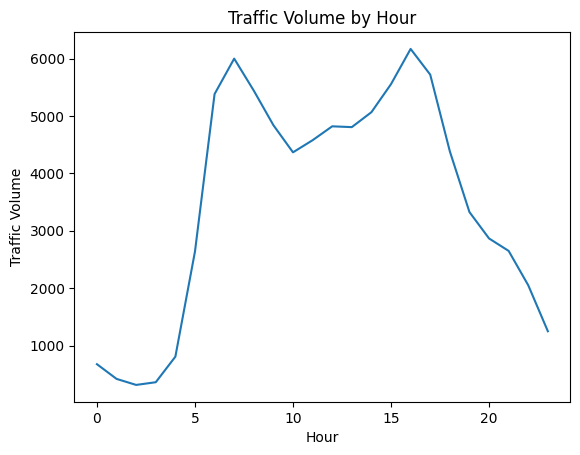

In [13]:
df_grouped_hour['traffic_volume'].median().plot(kind='line', title='Traffic Volume by Hour', xlabel='Hour', ylabel='Traffic Volume')

Two peaks shows two rush hour times. In the morning and In the evening

### Grouped hourly, by the weather

types of weather

In [14]:
df['weather_main'].value_counts()

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

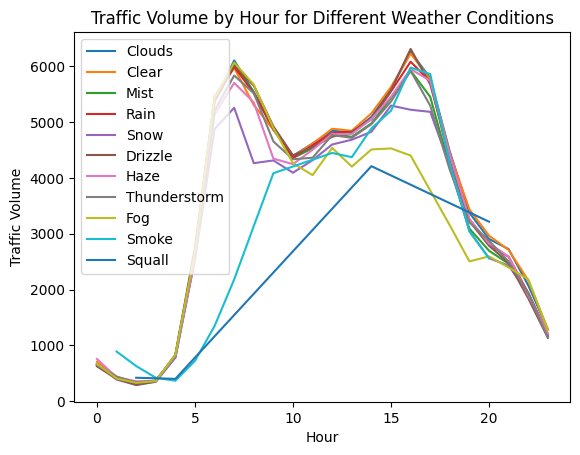

In [15]:
# Define the weather conditions to plot
weather_conditions = ['Clouds', 'Clear', 'Mist', 'Rain', 'Snow', 'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over each weather condition
for condition in weather_conditions:
    # Filter the dataframe for the current weather condition
    df_grouped_hour_condition = df[df['weather_main'] == condition].groupby('hour')
    
    # Plot the median traffic volume for the current weather condition
    ax.plot(df_grouped_hour_condition['traffic_volume'].median(), label=condition)

# Set the title, x-axis label, and y-axis label
ax.set_title('Traffic Volume by Hour for Different Weather Conditions')
ax.set_xlabel('Hour')
ax.set_ylabel('Traffic Volume')

# Add a legend
ax.legend(loc = 'upper left')

# Show the plot
plt.show()


In [16]:
# drop the rows with smoke and squall, since there is not enough data
df = df[df['weather_main'] != 'Smoke']
df = df[df['weather_main'] != 'Squall']
df['weather_main'].value_counts()

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Name: count, dtype: int64

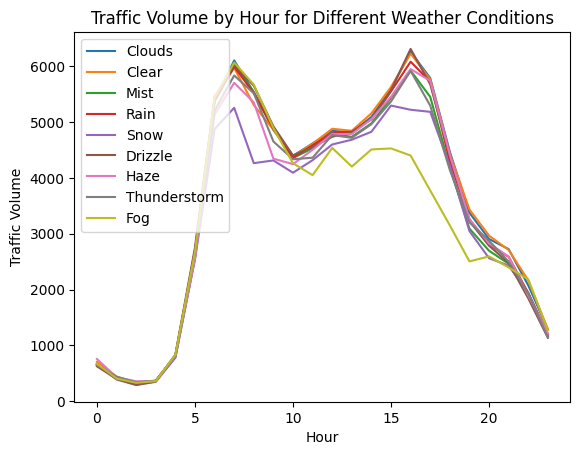

In [17]:
fig, ax = plt.subplots()

weather_conditions.remove('Smoke')
weather_conditions.remove('Squall')

# Iterate over each weather condition
for condition in weather_conditions:
    # Filter the dataframe for the current weather condition
    df_grouped_hour_condition = df[df['weather_main'] == condition].groupby('hour')
    
    # Plot the median traffic volume for the current weather condition
    ax.plot(df_grouped_hour_condition['traffic_volume'].median(), label=condition)

# Set the title, x-axis label, and y-axis label
ax.set_title('Traffic Volume by Hour for Different Weather Conditions')
ax.set_xlabel('Hour')
ax.set_ylabel('Traffic Volume')

# Add a legend
ax.legend(loc = 'upper left')

# Show the plot
plt.show()

Visually, the only significant difference lays on Fog and snow. The rest of those conditions, are pretty similar. So we will use clear weather condition as the representative of the other ones

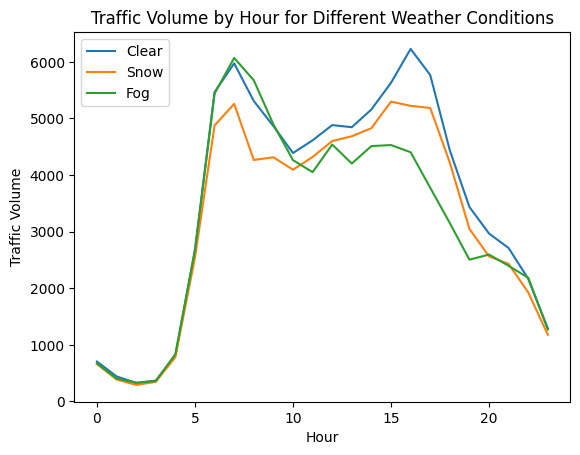

In [18]:
weather_conditions = ['Clear', 'Snow', 'Fog']
fig, ax = plt.subplots()

# Iterate over each weather condition
for condition in weather_conditions:
    # Filter the dataframe for the current weather condition
    df_grouped_hour_condition = df[df['weather_main'] == condition].groupby('hour')
    
    # Plot the median traffic volume for the current weather condition
    ax.plot(df_grouped_hour_condition['traffic_volume'].median(), label=condition)

# Set the title, x-axis label, and y-axis label
ax.set_title('Traffic Volume by Hour for Different Weather Conditions')
ax.set_xlabel('Hour')
ax.set_ylabel('Traffic Volume')

# Add a legend
ax.legend(loc = 'upper left')

# Show the plot
plt.show()

**Graph anomaly on Fog Condition**

- There is no multiple peaks on Fogs.
- The morning traffic volume are similar to clear, but the evening one are far from the clear one, even far from the snow condition aswell


Let's see why

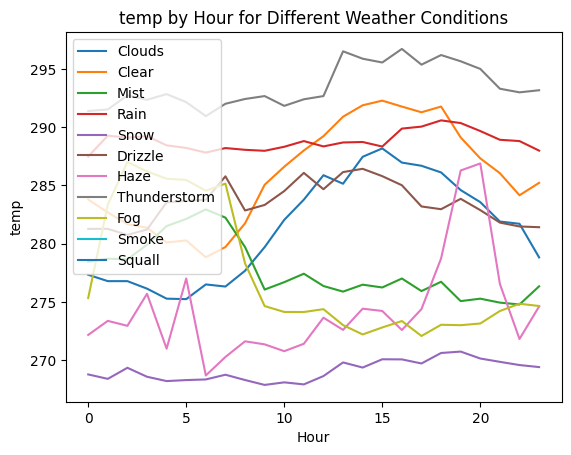

In [19]:
weather_conditions = ['Clouds', 'Clear', 'Mist', 'Rain', 'Snow', 'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']

def plot_all(column_name) :
    fig, ax = plt.subplots()

    # Iterate over each weather condition
    for condition in weather_conditions:
        # Filter the dataframe for the current weather condition
        df_grouped_hour_condition = df[df['weather_main'] == condition].groupby('hour')
        
        # Plot the median traffic volume for the current weather condition
        ax.plot(df_grouped_hour_condition[column_name].median(), label=condition)

    # Set the title, x-axis label, and y-axis label
    title_str = column_name + ' by Hour for Different Weather Conditions'  
    ax.set_title(title_str)
    ax.set_xlabel('Hour')
    ax.set_ylabel('temp')

    # Add a legend
    ax.legend(loc = 'upper left')

    # Show the plot
    plt.show()

def plot_weather_on_column(column_name, weather ) :
    fig, ax = plt.subplots()

    # find weatherif exist in weather_conditions list
    if weather in weather_conditions :
        df_grouped_hour_condition = df[df['weather_main'] == weather].groupby('hour')
        ax.plot(df_grouped_hour_condition[column_name].median(), label=weather)
    else :
        print('Weather not found')
        return

    # Set the title, x-axis label, and y-axis label
    title_str = column_name + ' by Hour for Different Weather Conditions'  
    ax.set_title(title_str)
    ax.set_xlabel('Hour')
    ax.set_ylabel('temp')

    # Add a legend
    ax.legend(loc = 'upper left')

    # Show the plot
    plt.show()

plot_all('temp')

The temp is very different, so we can not conclude from this parameter.

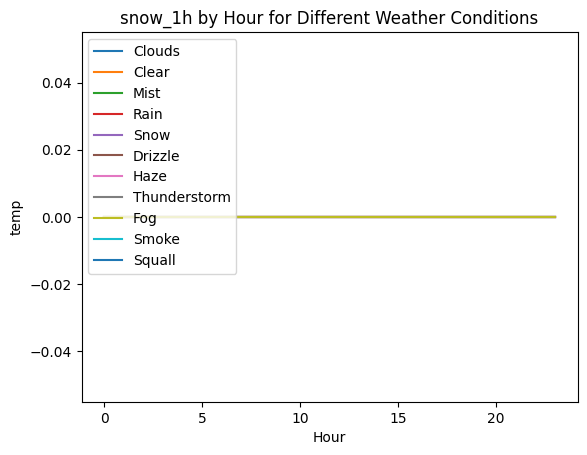

In [20]:
plot_all('snow_1h')

All data in snow_1h and rain_1h has 0 in it, so we got no information from this

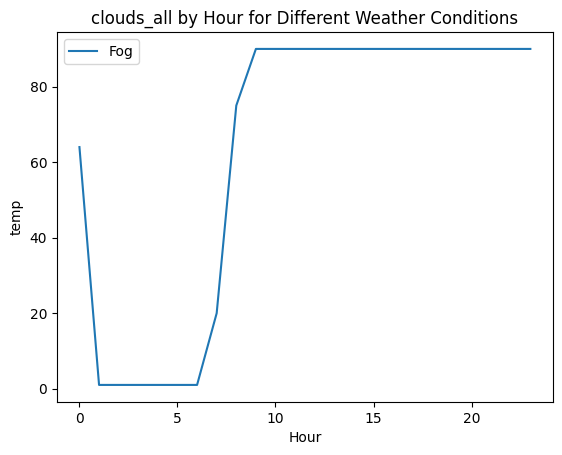

In [21]:
plot_weather_on_column('clouds_all', 'Fog')

<AxesSubplot: title={'center': 'Traffic Volume by Hour'}, xlabel='Hour', ylabel='Traffic Volume'>

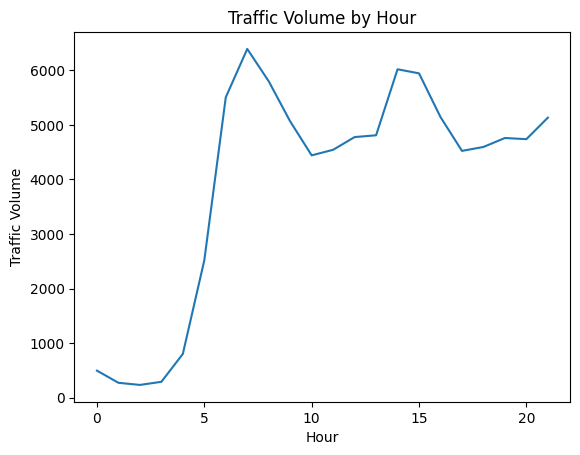

In [22]:
query = """
        SELECT *
        FROM df
        WHERE weather_main = 'Fog' AND day = 3 AND month = 12;
"""

spesif_date = ps.sqldf(query, locals())


spesif_date['traffic_volume'].plot(kind='line', title='Traffic Volume by Hour', xlabel='Hour', ylabel='Traffic Volume')


C:\Users\fauza\AppData\Local\Temp\ipykernel_1604\2445861507.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df[df['weather_main'] == 'Fog'].groupby('hour')['traffic_volume'].median().plot(kind='line', title='Traffic Volume by Hour', xlabel='Hour', ylabel='Traffic Volume')


<AxesSubplot: title={'center': 'Traffic Volume by Hour'}, xlabel='Hour', ylabel='Traffic Volume'>

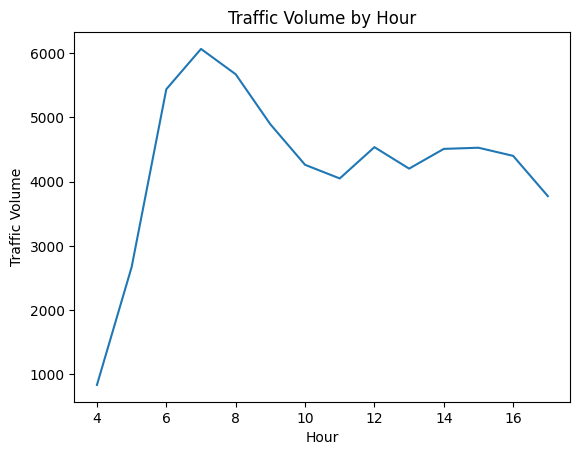

In [24]:
# describe df on weather Fog
filtered_df = df[(df['hour'] >= 4) & (df['hour'] <= 17)]

# plot the traffic volume for the foggy days filtered

filtered_df[df['weather_main'] == 'Fog'].groupby('hour')['traffic_volume'].median().plot(kind='line', title='Traffic Volume by Hour', xlabel='Hour', ylabel='Traffic Volume')


### Conclusion

We dont have enough data to know why there is no two peaks in fog times. This could be because of lack of data, or lack of informative columns. It could be because of an untracked parameter, or people are just not using traffic as much in the evening on the foggy times. It could be because of visibility reasons in the evening, where fogs plus low light results in people not using traffic as much. But, this is all an assumption, not backed with any statistical data